# Analysis of Wine Data Set

For our analysis we will focus on the following research questions:

1. **Which variable is most useful in determining the quality of a wine?**
2. **What properties are tied closest to a wine having a high alcohol percentage?**

We will look at these research questions with the red and white wine data sets separately and then draw overall conclusions.


In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import sys, os
sys.path.insert(0, os.path.abspath('..'))
from scripts.project_functions import *

## Red Wine Data Set

In [6]:
red_wine_df = load_and_process("../../data/raw/winequality-red.csv", ";")
red_wine_df.head()

,fa,va,ca,rs,chlorides,fsd,tsd,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


Insert correlation plot***

#### Question 1: Which variable is most useful in determining the quality of a red wine?

Add plots that look at quality versus other attributes using the violin/strip plot

#### Question 2: What properties are tied closest to a red wine having a high alcohol percentage?

reference the correlation plot, then use jointplot to show relationships

## White Wine Data Set

In [8]:
white_wine_df = load_and_process("../../data/raw/winequality-white.csv", ";")
white_wine_df.head()

,fa,va,ca,rs,chlorides,fsd,tsd,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6


<AxesSubplot:>

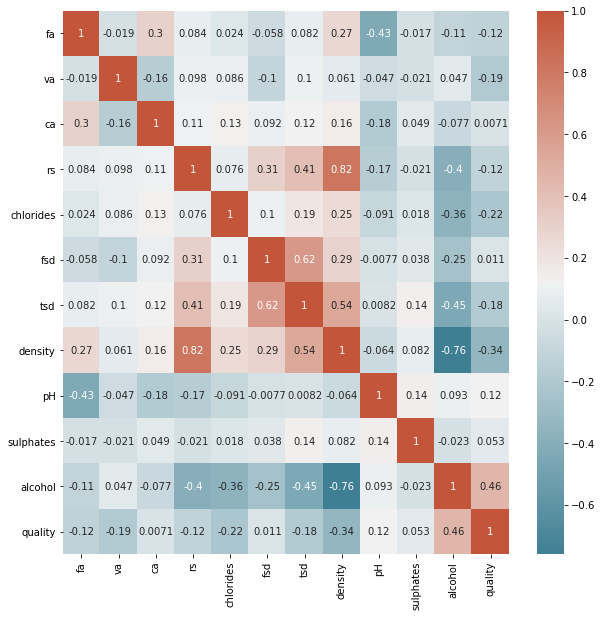

In [9]:
corr = white_wine_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, 
            xticklabels=corr.columns, 
            yticklabels=corr.columns, 
            annot=True, 
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

#### Question 1: Which variable is most useful in determining the quality of a white wine?

To explore this, we will look at some of the graphs in our white wine exploration on our data. 

Text(0, 0.5, 'Residual Sugar')

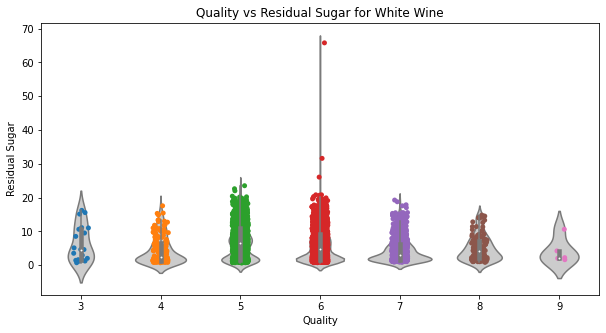

In [10]:
quality_group = white_wine_df.groupby('quality')
plt.figure(figsize=(10,5))

sns.violinplot(x="quality", y="rs", data=white_wine_df, color="0.8")
sns.stripplot(x='quality', y='rs', data=white_wine_df, jitter=True, zorder=1)

plt.title("Quality vs Residual Sugar for White Wine")
plt.xlabel("Quality")
plt.ylabel("Residual Sugar")

There doesn't seem to be much of a patter or relationship arrising from this plot, however looking at our numerical correlation plot it seems that alcohol has a strong correlation to quality! So lets check that out next!

Text(0, 0.5, 'Alcohol %')

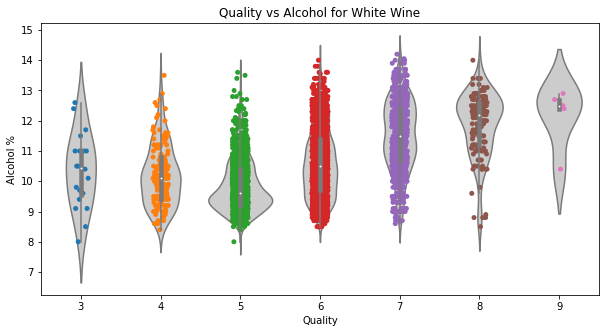

In [11]:
quality_group = white_wine_df.groupby('quality')
plt.figure(figsize=(10,5))

sns.violinplot(x="quality", y="alcohol", data=white_wine_df, color="0.8")
sns.stripplot(x='quality', y='alcohol', data=white_wine_df, jitter=True, zorder=1)

plt.title("Quality vs Alcohol for White Wine")
plt.xlabel("Quality")
plt.ylabel("Alcohol %")

So in conjunction with the numerical correlation plot this violin plot suggests that as the alcohol persentage increases, so does the quality, but it seems to be a "sweet spot" range that starts around 8.5% - 13.5%. Although it is important to remember correlation does not equal causation, by simply observing the results of the graphs, it you suggest that the alcohol percentage could be a good indication of the quality of the wine. 

#### Question 2: What properties are tied closest to a white wine having a high alcohol percentage?
To observe this, we will refer to the numerical correlation plot in which volitile acid and pH seems to have the highest correlation to the alcohol %

<Figure size 576x576 with 0 Axes>

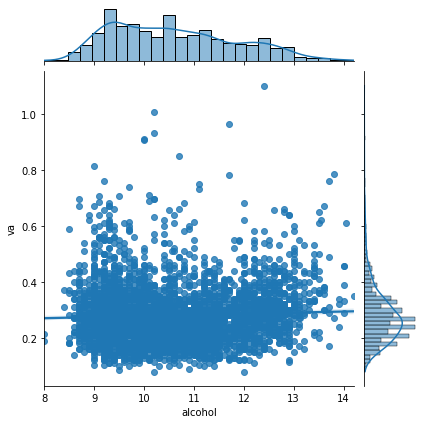

In [12]:
plt.figure(figsize=(8,8))

sns.jointplot(x="alcohol", y="va", data=white_wine_df, kind='reg')

The trend line seems to be postively sloped, which is a good sign suggesting that Volatle acid maybe a key factor. Lets check pH next.

<Figure size 576x576 with 0 Axes>

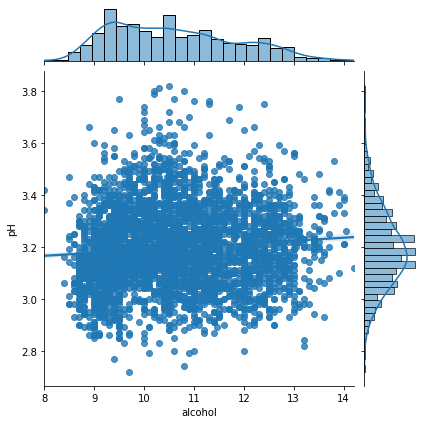

In [14]:
plt.figure(figsize=(8,8))

sns.jointplot(x="alcohol", y="pH", data=white_wine_df, kind='reg')

Also positive, **this is good**! It makes sense that if the "va" is correlated then pH should be too, since it is an acid afterall. hard to draw the conclusion that volatile acid would be the only acid that affects the alcohol percentage. However, for white wine it seems to be the case that va is affecting the pH which in turn affects the alcohol content. 

---

## Conclusions for Both Types of Wine

Answers to our research questions:

1. **Which variable is most useful in determining the quality of a wine?**
    - Stephanie
2. **What properties are tied closest to a wine having a high alcohol percentage?**
    - Isaac

Upon inspection of both wines, it seems that there is *not* a particular type of acid that necessarily indicates a wine's alcohol %,
but rather, the **pH** that would be the best property that is indicative of the alcohol content. 